# Fake News Detection using NLP

In [1]:
import pandas as pd 
import numpy as np
import re 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## 1. Data Loading and Labeling

In [2]:
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

In [3]:
true_df.shape

(21417, 4)

In [4]:
fake_df.shape

(23481, 4)

In [5]:
true_df['label'] = 1
fake_df['label'] = 0

In [6]:
data = pd.concat([true_df, fake_df], ignore_index=True)

In [7]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
data.shape

(44898, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [8]:
data.sample(5)

,title,text,subject,date,label
31481,WOW! HERE’S THE LIST Of Obamacare Taxes Abolis...,The American Health Care Act (HR 1628) passed ...,politics,"May 5, 2017",0
34343,Trump Considering Firing Sessions And Replaci...,"On Saturday, amateur president Donald Trump wh...",News,"July 24, 2017",0
21143,IS IVANKA TRYING TO CONVINCE Her Father To Bre...,Watch this video compilation where Trump makes...,left-news,"Apr 24, 2017",0
43105,Viewers Are DEMANDING Shepard Smith Be FIRED A...,"Only one day ago, FOX News published a factual...",left-news,"Nov 15, 2017",0
28899,Philippine president sidelines police in war o...,MANILA (Reuters) - Philippine President Rodrig...,worldnews,"October 11, 2017",1


## 2. Understand the Data

In [7]:
data.shape

(44898, 5)

In [8]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(209)

In [10]:
# remove duplicates
data.drop_duplicates(keep="first",inplace=True)

In [10]:
data.label.value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [11]:
data.shape

(44689, 5)

## 3. Exploratory Data Analysis (EDA)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [12]:
data.value_counts("label")

label
0    23481
1    21417
Name: count, dtype: int64

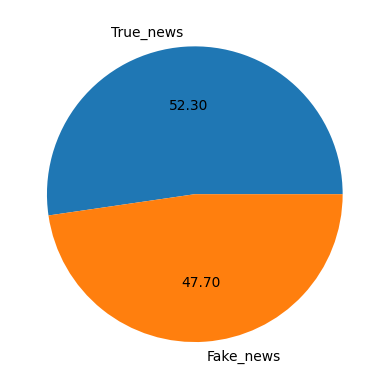

In [13]:
plt.pie(data["label"].value_counts(),labels=["True_news","Fake_news"],autopct="%0.2f")
plt.show()

In [14]:
labels=["True_news","Fake_news"]
labels_counts = data.value_counts("label")

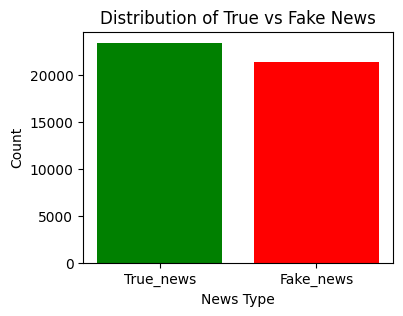

In [15]:
plt.figure(figsize=(4,3))
plt.bar(labels, labels_counts, color=['green', 'red'])
plt.title('Distribution of True vs Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

In [16]:
# calculate number of character
data["num_characters"]=data["text"].apply(len)

In [17]:
# calculate number of words
data["num_words"]=data["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
# calculate number of sentences
data["num_sentences"]=data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
data.sample(5)

,title,text,subject,date,label,num_characters,num_words,num_sentences
20162,Trump to attend NATO summit in Brussels May 25,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"March 22, 2017",1,1003,181,5
25120,WATCH: INDOCTRINATED COLLEGE STUDENTS Are Stun...,Would Hillary s every day Americans answer t...,politics,"Jun 23, 2016",0,238,39,2
37651,CBS Reporter Asks Putin How Comey’s Firing Wil...,Russian President Vladimir Putin got sassy wit...,politics,"May 10, 2017",0,2535,463,14
35487,Trump lifts Cyber Command status to boost cybe...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"August 18, 2017",1,2856,502,17
27387,NOT NEWS: [Graphic Video] Michigan Woman Runs ...,This is a story that will never make the news....,politics,"Apr 9, 2015",0,1397,266,7


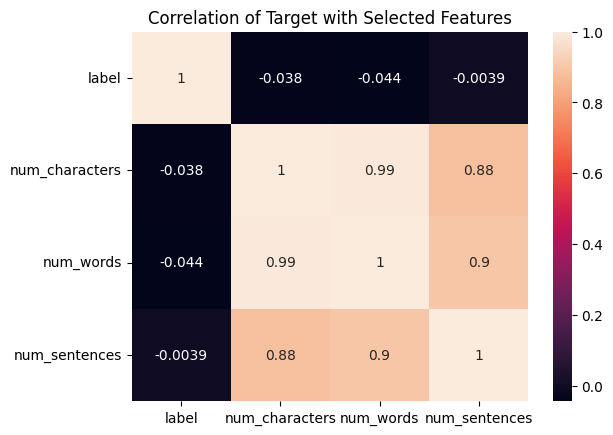

In [20]:
selected_cols = ["label", "num_characters","num_words"	,"num_sentences"]
corr_matrix = data[selected_cols].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation of Target with Selected Features")
plt.show()

## 4. Data PreProcessing
- lowercase
- remove special characters
- removing stop words and punctuations
- tokenization
- stemming/lemmatization

In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['cleaned_text'] = data['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91708\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91708\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
data.sample(5)

,title,text,subject,date,label,num_characters,num_words,num_sentences,cleaned_text
22751,CRITICALLY WOUNDED GOP Rep. Steve Scalise Stoo...,"Trump-hating, Bernie Sanders supporter and dom...",left-news,"Jun 15, 2017",0,2303,407,11,trumphating bernie sander supporter domestic t...
27930,Conservative Calls President Obama A ‘Muslim’...,When former Tea Party congressman Joe Walsh de...,News,"December 30, 2016",0,3403,660,26,former tea party congressman joe walsh decided...
41868,GAFFE OF THE DAY: VA Gov. #TerryMcAuliffe Blam...,VIRGINIA governor Terry McAuliffe decided to g...,Government News,"Jun 14, 2017",0,1263,245,14,virginia governor terry mcauliffe decided get ...
1592,Blackwater founder Prince details meeting with...,(This version of the Dec 6 story corrects par...,politicsNews,"December 6, 2017",1,3768,694,22,version dec story corrects paragraph add new p...
33531,RUSSIA HITS OBAMA…HARD: “We are reaching a rea...,U.S.-led coalition air strikes killed dozens o...,politics,"Sep 19, 2016",0,3415,590,21,usled coalition air strike killed dozen syrian...


# 5. Feature Extraction

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_text'])
y = data['label']

In [25]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5680203 stored elements and shape (44689, 5000)>

In [26]:
y.shape

(44689,)

# 6. Model Building

In [27]:
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB

In [29]:
bnb=BernoulliNB()
mnb=MultinomialNB()

In [30]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# 7. Model Evaluation

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [33]:
bnb.fit(X_train_dense,y_train)
y_pred2=bnb.predict(X_test_dense)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9625195793242336
[[4577  179]
 [ 156 4026]]
0.9574316290130797


In [34]:
mnb.fit(X_train_dense,y_train)
y_pred3=mnb.predict(X_test_dense)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9302976057283509
[[4454  302]
 [ 321 3861]]
0.9274561614220515


## confusion matrix

Text(0.5, 1.0, 'ROC Curve')

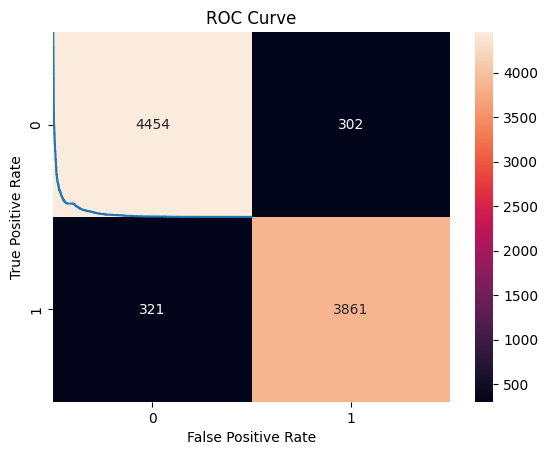

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt='d')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, mnb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# 8. Error Analysis

In [36]:
misclassified = data.iloc[X_test[y_test != y_pred3].indices] ## For multinomial
print(misclassified[['text', 'label']].head(5))

                                                   text  label
4903  BENGHAZI, Libya (Reuters) - Libyan security fo...      1
2150  Why did the Democrat VA Governor throw gasolin...      0
4649  HONOLULU (Reuters) - President Donald Trump ar...      1
1053  BATTAMBANG, Cambodia (Reuters) - Sin Rozeth s ...      1
3441  NAIROBI (Reuters) - Kenya s election board mus...      1


# 9. Insights
- Top words: Check top features with model.feature_log_prob_

- Class balance: Was it balanced? Affects performance.

- Precision vs Recall: High precision = fewer false positives.

- Learnings & Improvements: e.g., try BERT, ensemble models, etc.

# 10. Bonus (Optional)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib

# Try Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_dense, y_train)


LogisticRegression(max_iter=1000)

In [38]:
# Save model
joblib.dump(mnb, 'naive_bayes_fake_news.pkl')

['naive_bayes_fake_news.pkl']

In [39]:
joblib.dump(bnb, 'naive_bayes_fake_news.pkl')

['naive_bayes_fake_news.pkl']

In [40]:
joblib.dump(gnb, 'naive_bayes_fake_news.pkl')

['naive_bayes_fake_news.pkl']

## Check with other algorithms

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [42]:
lrc=LogisticRegression()
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)

In [43]:
clfs={
    "LR":lrc,
    "KN":knc,
    "DT":dtc,
    "RF":rfc,
    "BNB":bnb
}

In [44]:
def train_classifier(clf,X_train_dense,y_train,X_test_dense,y_test):
    clf.fit(X_train_dense,y_train)
    y_pred=clf.predict(X_test_dense)
    accuracy=accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [45]:
train_classifier(bnb,X_train_dense,y_train,X_test_dense,y_test)

(0.9625195793242336, 0.9574316290130797)

In [46]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    accu,prec=train_classifier(clf,X_train_dense,y_train,X_test_dense,y_test)
    accuracy_scores.append(accu)
    precision_scores.append(prec)

In [47]:
performance_df_cv=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_score":accuracy_scores,"Precision_score":precision_scores})

In [48]:
performance_df_cv

,Algorithm,Accuracy_score,Precision_score
0,LR,0.986910,0.981293
1,KN,0.723092,0.937917
2,DT,0.994070,0.990264
3,RF,0.997427,0.995946
4,BNB,0.962520,0.957432


# Model improvement

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [50]:
X_train_dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
X_test_dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
clfs_tfidf={
    "LR":lrc,
    "KN":knc,
    "DT":dtc,
    "RF":rfc,
    "BNB":bnb,
    "MNB":mnb
    
}

In [53]:
accuracy_scores_tfidf=[]
precision_scores_tfidf=[]
for name,clf in clfs_tfidf.items():
    accu,prec=train_classifier(clf,X_train_dense,y_train,X_test_dense,y_test)
    accuracy_scores_tfidf.append(accu)
    precision_scores_tfidf.append(prec)

In [54]:
performance_df_tfidf=pd.DataFrame({"Algorithm":clfs_tfidf.keys(),"Accuracy_score":accuracy_scores_tfidf,"Precision_score":precision_scores_tfidf})

In [55]:
performance_df_tfidf

,Algorithm,Accuracy_score,Precision_score
0,LR,0.986910,0.981293
1,KN,0.723092,0.937917
2,DT,0.994070,0.990264
3,RF,0.997427,0.995946
4,GNB,0.908816,0.900166
5,BNB,0.962520,0.957432
6,MNB,0.930298,0.927456
